1x1 square lattice with 4 sites and 10 nm bond length


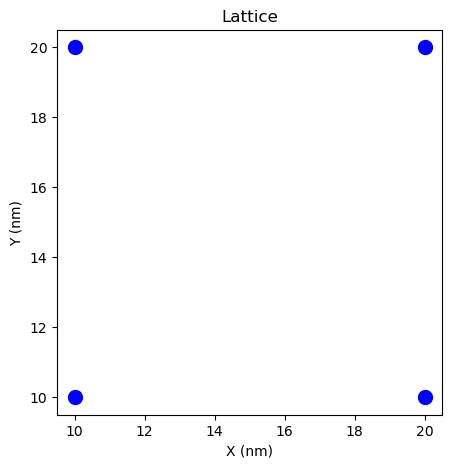

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HB_lattice import *

latt = HB_lattice()
latt.create_lattice('square', 1, 10)
# latt.create_custom_lattice("coords.csv") 

Hofstadter plot: using Hamiltonian method: hopping
Loaded parameters:


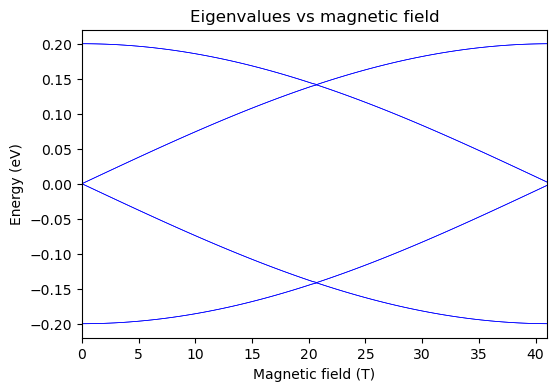

In [2]:
#ham_type = "hopping":
#t = [0.1, 0.01, ...]
#t_so = [0.01, ...]

#ham_type = "interpolation":
# a_param = 1
# b_param = 10

latt.plot_hofstadter(41, 100, g_factor=0, ham_type='hopping')

In [ ]:
# #in case if you want to run in parallel
# from joblib import Parallel, delayed

# b_field = np.linspace(0, 41.3, 200)

# eigvals = Parallel(n_jobs=-1)(
#     delayed(latt.eigenvalues_via_hopping)([-0.01], [0], b, add_peierls=True, add_zeeman=False)
#     for b in b_field
# )

DOS for the following eigenvalue set indices: [0]
energy range from -0.3 to 0.3
numerical smearing is 0.0001


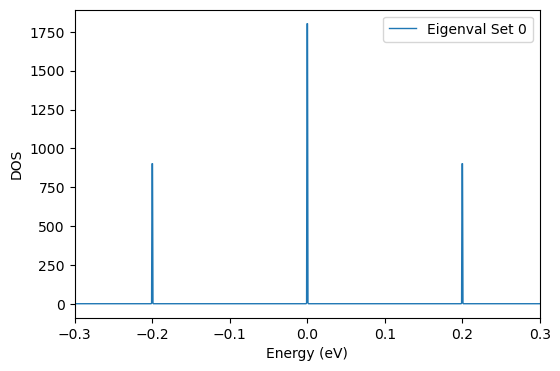

In [6]:
latt.plot_dos([0], e_min=-0.3, e_max=0.3)